In [2]:
import numpy as np
import matplotlib.pyplot as plt


In [3]:
from scipy.optimize import curve_fit
def func(x, a, b, c):
    return a * np.exp(-b * x) + c

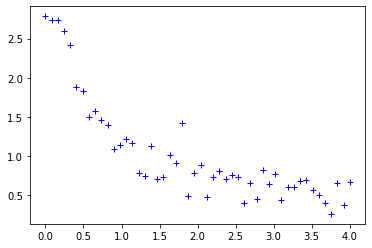

In [4]:
xdata = np.linspace(0, 4, 50)
y = func(xdata, 2.5, 1.3, 0.5)
rng = np.random.default_rng()
y_noise = 0.2 * rng.normal(size=xdata.size)
ydata = y + y_noise
plt.plot(xdata, ydata, 'b+', label='data')


[2.47115542 1.33483682 0.55225256]


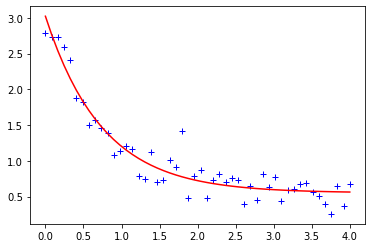

In [5]:
popt, pcov = curve_fit(func, xdata, ydata)
print(popt)
plt.plot(xdata, ydata, 'b+', label='data')
plt.plot(xdata, func(xdata, *popt), 'r-',
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))

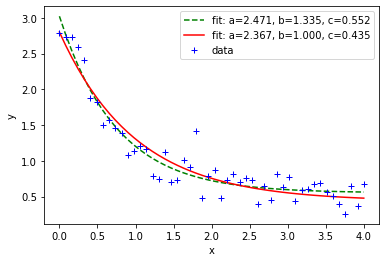

[[ 0.01173702  0.00231082 -0.00172342]
 [ 0.00231082  0.01371722  0.00666576]
 [-0.00172342  0.00666576  0.0047454 ]]
Param 1: 2.37 +- 0.11
Param 2: 1.00 +- 0.12
Param 3: 0.44 +- 0.07


In [6]:
popt2, pcov2 = curve_fit(func, xdata, ydata, bounds=([0.,0.,0.], [3., 1., 0.5]))

plt.plot(xdata, func(xdata, *popt), 'g--',
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))


plt.plot(xdata, func(xdata, *popt2), 'r-',
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt2))
plt.plot(xdata, ydata, 'b+', label='data')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
print (pcov2)
import math
for i in range(3):
    print("Param %d: %1.2f +- %1.2f" % (i+1,popt2[i],math.sqrt(pcov2[i][i])))